# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# 1Xyo4u8uXC1ZmMpatF05PJ

results = spotify.artist_top_tracks("1Xyo4u8uXC1ZmMpatF05PJ")


songs = []

for track in results['tracks']:
    songs.append({"name":track['name'],
                  "popularity":track['popularity'],
                  "duracion_min":track['duration_ms']/60000})

df = pd.DataFrame(songs)

print(df)


                                                name  popularity  duracion_min
0                      Timeless (feat Playboi Carti)          94      4.266667
1     One Of The Girls (with JENNIE, Lily Rose Depp)          94      4.078067
2                                            Starboy          92      3.840883
3                                    Blinding Lights          92      3.334000
4                                        Die For You          88      4.337550
5                           São Paulo (feat. Anitta)          88      5.027050
6                                          The Hills          89      4.037550
7                                    Save Your Tears          88      3.593767
8                                   Call Out My Name          87      3.806217
9  Save Your Tears (Remix) (with Ariana Grande) -...          83      3.183550


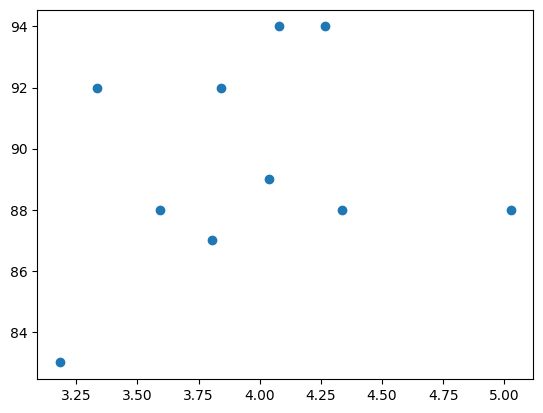

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['duracion_min'],df['popularity'])
plt.show()

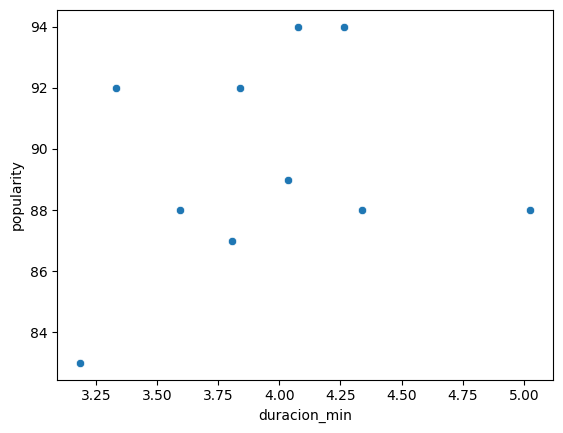

In [3]:
sns.scatterplot(df,x='duracion_min',y='popularity')
plt.show()

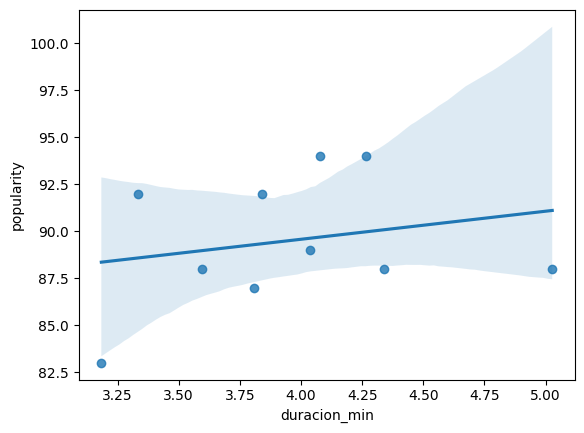

In [4]:
sns.regplot(df[df['popularity']>50],x='duracion_min',y='popularity')
plt.show()



A partir del análisis realizado sobre las canciones más populares del artista seleccionado en Spotify, se observa que no existe una relación clara entre la duración de las canciones y su popularidad. Los gráficos muestran que tanto canciones cortas como largas pueden alcanzar altos niveles de popularidad. Esto sugiere que otros factores, como el estilo musical, la promoción o la colaboración con otros artistas, pueden tener un mayor impacto en la popularidad de una canción que su